In [75]:
!pip install vaderSentiment


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
!pip install spacy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
!python -m spacy download en_core_web_md 

                                              0.0/42.8 MB ? eta -:--:--
                                              0.1/42.8 MB 2.8 MB/s eta 0:00:16
                                              0.5/42.8 MB 5.6 MB/s eta 0:00:08
     -                                        2.0/42.8 MB 14.6 MB/s eta 0:00:03
     ---                                      4.0/42.8 MB 21.2 MB/s eta 0:00:02
     -----                                    5.8/42.8 MB 24.6 MB/s eta 0:00:02
     -------                                  7.8/42.8 MB 29.3 MB/s eta 0:00:02
     --------                                 9.5/42.8 MB 30.5 MB/s eta 0:00:02
     ----------                              11.6/42.8 MB 46.9 MB/s eta 0:00:01
     ------------                            14.1/42.8 MB 46.7 MB/s eta 0:00:01
     ---------------                         16.5/42.8 MB 46.7 MB/s eta 0:00:01
     ----------------                        18.6/42.8 MB 46.7 MB/s eta 0:00:01
     ------------------                      20.2/


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
#importing libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.linear_model import LinearRegression
from itertools import product
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from numpy.linalg import norm
from math import log
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment  import  SentimentIntensityAnalyzer
import spacy
stopwords = stopwords.words('english')


%matplotlib inline
sns.set(color_codes = True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [79]:
# from google.colab import drive
# drive.mount('/content/drive')

In [80]:
df=pd.read_excel('beer-reviews.xlsx')


In [81]:
df.head()

,item,body,rating
0,Kentucky Brunch Brand Stout,"Amazing stout, expensive but worth the price!",5.00
1,Kentucky Brunch Brand Stout,This beer meet and exceeded all the unreal hyp...,5.00
2,Kentucky Brunch Brand Stout,Let it sit and warm to the room a little ... u...,5.00
3,Kentucky Brunch Brand Stout,"A small pour, ebony dark, no real head. Intens...",4.67
4,Kentucky Brunch Brand Stout,"Vintage 2022, served on tap at Toppling Goliat...",5.00


In [82]:

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words = [word for word in filtered_words if word.isalnum()]
    return " ".join(filtered_words)
df['body']=df['body'].str.lower()

df['body'] = df['body'].astype(str).apply(remove_stopwords)
df['body']


0                     amazing stout expensive worth price
1           beer meet exceeded unreal hype simply amazing
2                   let sit warm room little unbelievable
3       small pour ebony dark real head intense rich a...
4       vintage 2022 served tap toppling goliath snuli...
                              ...                        
6626    poured bottle snifter home thanks darin share ...
6627    good god man holy shit really good beer blesse...
6628    appearance bubble show lifts head fullsome thr...
6629    pours sure describe color golden yellow brown ...
6630    tropical nose sweet like sunnyd nice acidity a...
Name: body, Length: 6631, dtype: object

# Task B
Assume that a customer, who will be using this recommender system, has specified 3 attributes
in a product. E.g., one website describes multiple attributes of beer (but you should choose attributes
from the actual data)
Perform a word frequency analysis of beer reviews is a better way
to find important attributes in the actual data.

In [83]:
beer_attributes = [
    "aromatic", "hoppy", "malty", "bitter", "sweet", "sour", "fruity", "citrusy", "spicy", "floral", "earthy", "woody", "herbal", "caramel",
    "roasty", "nutty", "chocolatey", "smoky", "creamy", "crisp", "smooth", "hazy", "clear", "cloudy", "full-bodied", "light-bodied",
    "refreshing", "complex", "balanced", "robust", "dry", "sweetness", "alcohol content", "carbonation", "mouthfeel", "aftertaste",
    "head retention", "astringency", "esters", "phenols", "acidity", "diacetyl", "yeastiness", "clarification", "oxidation", "temperature",
    "abv (alcohol by volume)", "ibu (international bitterness units)", "srm (standard reference method)", "gravity", "fermentation", "lagering",
    "ale", "pilsner", "stout", "porter", "wheat", "lambic", "saison", "ipa (india pale ale)", "apa (american pale ale)", "dipa (double ipa)",
    "tripel", "quadrupel", "belgian", "german", "british", "american", "czech", "irish", "scottish", "baltic", "hefeweizen", "kolsch", "barleywine",
    "sours", "barrel-aged", "tropical", "funky", "crispy", "toasty", "tangy", "savory", "juicy", "effervescent", "velvety", "silky", "pungent",
    "robust", "elegant", "velvety", "bold", "harmonious", "well-rounded", "intense", "layered"]

In [84]:
# Calculate word frequencies using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body'])

# Calculate the frequency of each word in the reviews
word_frequencies = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': np.array(X.sum(axis=0))[0]})
word_frequencies=word_frequencies.sort_values(['frequency'],ascending=False)
word_frequencies

,word,frequency
1829,beer,5266
7320,head,3650
14880,taste,3483
8867,light,2891
8885,like,2537
...,...,...
7520,hoax,1
7521,hobbyists,1
7526,hog,1
7527,hogan,1


In [85]:
word_list = list(word_frequencies['word'])
attributes = [x for x in word_list if x in beer_attributes]
print(attributes)

['sweet', 'carbonation', 'mouthfeel', 'smooth', 'caramel', 'clear', 'sweetness', 'dry', 'bitter', 'malty', 'creamy', 'stout', 'balanced', 'crisp', 'hazy', 'earthy', 'ale', 'sour', 'aftertaste', 'floral', 'fruity', 'refreshing', 'spicy', 'complex', 'hoppy', 'belgian', 'herbal', 'tropical', 'american', 'wheat', 'juicy', 'cloudy', 'funky', 'roasty', 'woody', 'intense', 'silky', 'pilsner', 'porter', 'bold', 'acidity', 'citrusy', 'toasty', 'nutty', 'german', 'barleywine', 'esters', 'saison', 'temperature', 'tripel', 'robust', 'effervescent', 'velvety', 'tangy', 'lambic', 'gravity', 'astringency', 'smoky', 'pungent', 'aromatic', 'hefeweizen', 'oxidation', 'diacetyl', 'chocolatey', 'sours', 'savory', 'phenols', 'fermentation', 'layered', 'irish', 'british', 'elegant', 'crispy', 'czech', 'yeastiness', 'baltic', 'quadrupel', 'scottish', 'harmonious', 'kolsch']


In [86]:
array_df = pd.DataFrame({'attribute': attributes})
attr_word_freq=word_frequencies.merge(array_df,left_on='word', right_on='attribute')
attr_word_freq= attr_word_freq.drop('attribute',axis=1)
attr_word_freq

,word,frequency
0,sweet,2145
1,carbonation,1825
2,mouthfeel,1175
3,smooth,1042
4,caramel,966
...,...,...
75,baltic,8
76,quadrupel,5
77,scottish,3
78,harmonious,3


## Task C

Perform a similarity analysis using cosine similarity (without word embeddings) with the 3 attributes specified by the customer and the reviews.
The similarity script should accept as input a file with the product attributes, and calculate similarity scores (between 0 and 1) between these attributes and each review. That is, the output file should have 3 columns – product_name (for each product, the product_name will repeat as many times as there are reviews of the product), product_review and similarity_score.


In [87]:
#open text file in read mode
text_file = open("attributes.txt", "r")
user_pref = text_file.read().lower()
#close file

text_file.close()

words_to_compare = user_pref.split(',')

words_to_compare = [word.strip() for word in words_to_compare]

words_to_compare

['sweet', 'carbonation', 'mouthfeel']

In [88]:
#performing cosine similarity

# Create a CountVectorizer with a custom vocabulary
vectorizer = CountVectorizer(vocabulary=words_to_compare)

# Transform the 'body' column using CountVectorizer
X = vectorizer.transform(df['body'])
Y = vectorizer.transform(words_to_compare)
# Calculate cosine similarity
cosine_similarities = cosine_similarity(X, Y)

# Create a new DataFrame with product name, product review, and similarity score
result_df = pd.DataFrame({
    'Product Name': df['item'],
    'Product Review': df['body'],
    'Similarity Score': cosine_similarities.mean(axis=1)
})

# Display the result DataFrame
similarity_df = result_df.sort_values(by='Similarity Score',ascending = False)
similarity_df

,Product Name,Product Review,Similarity Score
3374,Imperial Biscotti Break,pours dark brown small tan cap light lacing sm...,0.57735
3741,Schaefer Light,silly attempt philosophical description review...,0.57735
5438,Oatmeal Stout,poured bottle pint glass appearance nearly bla...,0.57735
2200,Mirror Pond Pale Ale,one dozen years since last reviewed 12oz tulip...,0.57735
5209,Desperados,poured 330ml bottle pours dark straw tight bub...,0.57735
...,...,...,...
2923,New,curious lack destinct flavor,0.00000
2924,New,grainy worth try,0.00000
2925,Voodoo Ranger Fruit Force,disgusting shameful real crappy beer new belgi...,0.00000
2927,Voodoo Ranger Fruit Force,transported back 1969 memory stirring glass ha...,0.00000


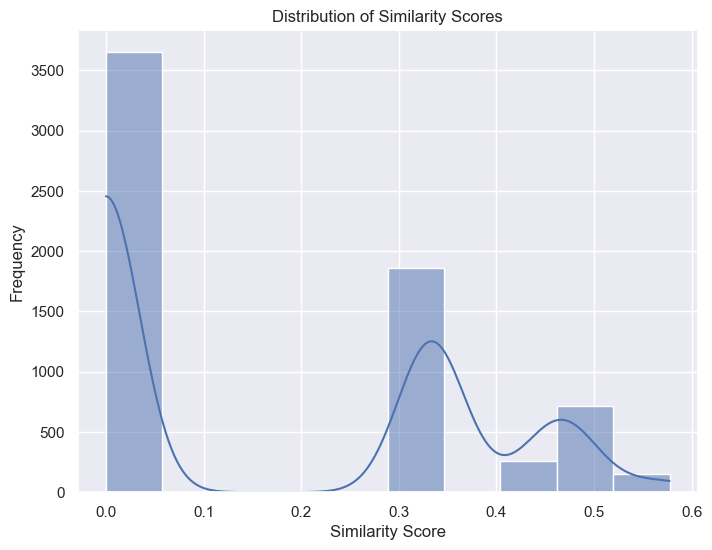

In [89]:
# Plot the distribution of similarity scores
plt.figure(figsize=(8, 6))
sns.histplot(data=similarity_df, x='Similarity Score', bins=10, kde=True)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Scores')
plt.show()

## Task D

For every review, perform a sentiment analysis (using VADER or any LLM). In case you have to change the default values of words in the VADER lexicon

In [90]:

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def perform_sentiment_analysis(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

# Apply sentiment analysis to each review and store the scores in a new column
similarity_df['Sentiment Scores'] = similarity_df['Product Review'].apply(perform_sentiment_analysis)
sentiment_similarity_df = similarity_df.sort_values(by = 'Similarity Score', ascending = False)
sentiment_similarity_df

,Product Name,Product Review,Similarity Score,Sentiment Scores
3374,Imperial Biscotti Break,pours dark brown small tan cap light lacing sm...,0.57735,"{'neg': 0.086, 'neu': 0.679, 'pos': 0.235, 'co..."
2879,Tynt Meadow,330ml bottle total wine kennesaw georgia appea...,0.57735,"{'neg': 0.035, 'neu': 0.871, 'pos': 0.093, 'co..."
6621,King JJJuliusss,poured snifter beer pours super hazy color mas...,0.57735,"{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'comp..."
619,Abbaye Des Rocs [Brasserie Des Rocs Brune],pours murky chestnut color red hints medium to...,0.57735,"{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp..."
3099,Munich Fest,pours clear yellow straw color visible carbona...,0.57735,"{'neg': 0.029, 'neu': 0.802, 'pos': 0.169, 'co..."
...,...,...,...,...
5172,Michelob Ultra Amber,carbs 95 cals 4 abv 12 fl oz usd per sixer bou...,0.00000,"{'neg': 0.113, 'neu': 0.632, 'pos': 0.256, 'co..."
5918,Carlton Cold,looks like beer smells tastes like urine metal...,0.00000,"{'neg': 0.166, 'neu': 0.61, 'pos': 0.224, 'com..."
5917,Red Dog,dog came back rescued thought gone got back be...,0.00000,"{'neg': 0.054, 'neu': 0.603, 'pos': 0.343, 'co..."
5173,Michelob Ultra Amber,like solid light easy drinking beer,0.00000,"{'neg': 0.0, 'neu': 0.3, 'pos': 0.7, 'compound..."


## Task E

Create an evaluation score for each beer that uses both similarity and sentiment scores.
Now recommend 3 products to the customer.


In [91]:
# Defining weights for similarity and sentiment scores... giving 70% weight to similarity
similarity_weight = 0.6
sentiment_weight = 0.4

# Function to calculate the evaluation score using
def calculate_evaluation_score(similarity_score, sentiment_score):
    overall_sentiment_score = sentiment_score['compound']
    # Calculate the evaluation score as a weighted sum
    evaluation_score = (similarity_weight * similarity_score) + (sentiment_weight * overall_sentiment_score)
    return evaluation_score

# Calculate the evaluation score for each beer
sentiment_similarity_df['Evaluation Score'] = sentiment_similarity_df.apply(lambda row: calculate_evaluation_score(row['Similarity Score'], row['Sentiment Scores']), axis=1)

# Sort the beers by their evaluation scores in descending order
sentiment_similarity_df = sentiment_similarity_df.sort_values(by='Evaluation Score', ascending=False)

# Recommend the top 3 brands based on the highest evaluation scores
top_3_brands = sentiment_similarity_df.head(3)[['Product Name', 'Evaluation Score']]

# Display the recommended top 3 brands
print("Top 3 Recommended Brands:")
print(top_3_brands)


Top 3 Recommended Brands:
             Product Name  Evaluation Score
4058  Oktoberfest M√§rzen           0.74549
3181  Rodenbach Alexander           0.74505
6621      King JJJuliusss           0.74421


# Task F

In [92]:
# Load spaCy with medium-sized pretrained word vectors
nlp = spacy.load('en_core_web_md')

words_to_compare=' '.join(words_to_compare)
# Function to calculate word vector similarity
def word_vector_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

def calculate_evaluation_score(row):
    similarity_score = row['Similarity Score']
    sentiment_score = row['Sentiment Score']['compound']
    
    evaluation_score = (similarity_weight * similarity_score) + (sentiment_weight * sentiment_score)
    return evaluation_score

# Create a new DataFrame with product name, product review, and similarity score
result_df = pd.DataFrame({
    'Product Name': df['item'],
    'Product Review': df['body'],
    'Similarity Score': ''
})

result_df['Similarity Score'] = result_df['Product Review'].apply(word_vector_similarity, text2=words_to_compare)
result_df['Sentiment Score'] = result_df['Product Review'].apply(perform_sentiment_analysis)
result_df['Evaluation Score'] = result_df.apply(calculate_evaluation_score, axis=1)

sentiment_similarity_df=result_df.groupby('Product Name')['Evaluation Score'].agg('mean').reset_index().sort_values(by='Evaluation Score',ascending = False).reset_index(drop=True)

# Recommend the top 3 brands based on the highest evaluation scores
top_3_brands_word_vec = sentiment_similarity_df.head(3)[['Product Name', 'Evaluation Score']]

# Display the recommended top 3 brands
print("Top 3 Recommended Brands:")
print(top_3_brands_word_vec)

C:\Users\rahul\AppData\Local\Temp\ipykernel_5488\863601309.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


Top 3 Recommended Brands:
                         Product Name  Evaluation Score
0  Pseudo Sue - Peacharine Dry-Hopped          0.854290
1                  It Was All A Dream          0.847327
2             Wide Awake It's Morning          0.840216


In [74]:
top_3_brands_word_vec

NameError: name 'top_3_brands_word_vec' is not defined

# Task H
Using the top four attributes of beer (from word frequency analysis), calculate the lifts between
these attributes and any 10 beers in your data. Choose one beer, and find the most similar beer (among
the remaining 9) using the lift values. Explain your method.

In [20]:
def initialize(list1, list2):
    attribute_mentions_per_review = {attribute: set() for attribute in list1 + list2}
    co_mentions = {}
    for attr1 in list1 + list2:
        co_mentions[attr1] = {}
        for brand in list1 + list2:
            co_mentions[attr1][brand] = 0
    individual_mentions = {attr: 0 for attr in list1 + list2}
    lift_ratios = {}
    lift_already_calculated = set()
    return co_mentions, attribute_mentions_per_review, individual_mentions, lift_ratios, lift_already_calculated

In [21]:
def calculate_lift(attr1, brand, co_mentions, individual_mentions, total_posts):
    if attr1 == brand:
        return 0  # Lift ratio between the same brand is 0
    # Calculate lift using the formula: lift(attr1, brand) = (P(attr1 and brand) / (P(attr1) * P(brand))) * N
    p_attr1_and_brand = co_mentions[attr1][brand]
    p_attr1 = individual_mentions[attr1]
    p_brand = individual_mentions[brand]
    if p_attr1 == 0 or p_brand == 0:
        return 0
    else:
        return (p_attr1_and_brand / (p_attr1 * p_brand)) * total_posts

In [22]:
#selected_beer_brands=["Mornin' Delight","Nelson","Stickee Monkee","The Wild One","Corsendonk Christmas Ale"]
selected_beer_brands=["Old Chub","Voodoo Ranger Juicy Haze IPA","Harvest Ale (Limited Edition)","The Angel's Share - Bourbon Barrel-Aged","Weihenstephaner Korbinian","G'Knight","Mirror Pond Pale Ale","Antarctica Pilsen","Dark Lord","Breakfast Stout"]
attributes=list(attr_word_freq['word'])[:10]
attributes

['sweet',
 'carbonation',
 'mouthfeel',
 'smooth',
 'caramel',
 'clear',
 'sweetness',
 'dry',
 'bitter',
 'malty']

In [23]:
lift_df = pd.DataFrame(index=attributes, columns=selected_beer_brands)
for brand in selected_beer_brands:
    for attr in attributes:
        # Calculate support and joint support
        df['body'].fillna('', inplace=True)
        support_attr = len(df[df['body'].str.contains(attr)]) / len(df)
        support_brand = len(df[df['item'] == brand]) / len(df)
        joint_support = len(df[(df['body'].str.contains(attr)) & (df['item'] == brand)]) / len(df)

        # Calculate lift
        if support_attr * support_brand == 0:
            lift = 0  # Avoid division by zero
        else:
            lift = joint_support / (support_attr * support_brand)

        lift_df.at[attr, brand] = lift



In [24]:
lift_df

,Old Chub,Voodoo Ranger Juicy Haze IPA,Harvest Ale (Limited Edition),The Angel's Share - Bourbon Barrel-Aged,Weihenstephaner Korbinian,G'Knight,Mirror Pond Pale Ale,Antarctica Pilsen,Dark Lord,Breakfast Stout
sweet,2.691153,0.348853,2.093119,1.177379,1.712552,1.569839,0.52328,0.0,2.242627,1.255871
carbonation,0.576559,0.448434,1.681629,1.008977,1.467604,0.0,1.345303,2.017955,1.729676,0.807182
mouthfeel,0.841284,0.0,1.472247,2.20837,1.070725,2.20837,0.981498,0.0,1.682568,0.588899
smooth,0.978601,0.761134,2.283402,2.568827,0.622746,0.0,1.141701,1.141701,0.978601,2.055062
caramel,3.882319,0.0,3.774476,5.661714,4.117611,2.264686,1.509791,0.0,0.0,0.0
clear,0.999247,0.0,0.0,0.0,0.0,0.874341,2.331575,3.497363,0.0,0.0
sweetness,1.304801,0.0,3.044536,1.141701,0.830328,3.425103,0.0,0.0,1.304801,2.740083
dry,1.063171,0.0,0.620183,0.930275,0.676564,0.930275,0.0,0.0,0.0,0.74422
bitter,0.619141,0.481554,0.722331,0.0,0.787998,1.083497,0.722331,0.722331,0.619141,2.600392
malty,5.561364,0.0,1.081376,0.0,2.359367,3.244129,0.0,0.0,0.0,0.0


In [28]:
# Choose a reference beer (replace with the beer you want to use as reference)
reference_beer = 'Weihenstephaner Korbinian'

# Create a dictionary to store the most similar beer for each reference attribute
most_similar_beers = {}

# Iterate through the remaining nine beers
for beer in selected_beer_brands:
    if beer != reference_beer:  # Exclude the reference beer itself
        most_similar_attribute = None
        highest_lift = 0.0

        # Find the attribute with the highest lift value when associated with the reference beer
        for attribute in attributes:
            lift_value = lift_df.at[attribute, beer]
            if lift_value > highest_lift:
                highest_lift = lift_value
                most_similar_attribute = attribute

        # Store the most similar beer for the reference beer
        most_similar_beers[beer] = (most_similar_attribute, highest_lift)

# Find the beer with the highest lift value
most_similar_beer = max(most_similar_beers, key=lambda x: most_similar_beers[x][1])
similar_attribute, highest_lift = most_similar_beers[most_similar_beer]

print(f"The most similar beer to {reference_beer} is {most_similar_beer} based on the attribute '{similar_attribute}' with a lift value of {highest_lift}.")

The most similar beer to Weihenstephaner Korbinian is The Angel's Share - Bourbon Barrel-Aged based on the attribute 'caramel' with a lift value of 5.661714480874317.
